In [1]:
from brain import Brain

/home/ai2-yoda/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X_samples = np.random.random(size=(100, 125, 80, 1))
y_samples = np.random.random(size=(100, 3))

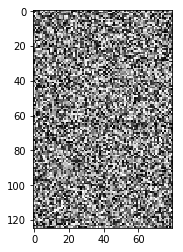

In [3]:
test = X_samples[1, :, :, :] * 255
plt.imshow(test.reshape((125, 80)).astype('int'), cmap='gray')

In [5]:
brain = Brain(0.001, input_shape = test.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 123, 78, 32)       320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 76, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 38, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 36, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 17, 64)        0         
__________

In [6]:
brain.train(X_train=X_samples, y_train = y_samples)

Train on 70 samples, validate on 30 samples
Epoch 1/1
 - 2s - loss: 1.6429 - val_loss: 1.7400

Epoch 00001: val_loss improved from inf to 1.73999, saving model to models/weights.hdf5


OSError: Unable to create file (unable to open file: name = 'models/weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [6]:
brain.save_model("test.h5")

In [7]:
brain.load_model("test.h5")

In [8]:
brain.predict(X_samples[2, :, :, :])

array([[0.359287 , 0.3258757, 0.3148373]], dtype=float32)